[23.6655, 25.5217, 23.5008, 22.3459, 23.2254, 23.4892, 22.6549, 22.2609, 21.5668, 21.483, 16.6392, 19.7759, 19.276, 17.6055, 16.1055, 15.139, 13.8277, 10.184, 9.6461, 9.5776, 8.3738, 7.1187, 7.03, 8.8973, 6.887, 4.6542, 4.6193, 4.448, 2.3908, 1.7361, 1.3194, 1.0726, 1.0369, 0.7984, 0.6349, 0.6304, 0.5591, 0.3562, 0.3875, 0.233, 0.2097, 0.1296, 0.1561, 0.1306, 0.126, 0.1063, 0.0934, 0.0657, 0.0636, 0.0732, 0.0727, 0.0598, 0.0604, 0.0702, 0.066, 0.07, 0.0446, 0.0652, 0.0516, 0.0563, 0.0494, 0.0427, 0.049, 0.0549, 0.0383, 0.0353, 0.0469, 0.046, 0.0627, 0.0494, 0.0415, 0.0542, 0.0585, 0.0286, 0.0384, 0.0567, 0.025, 0.0358, 0.0768, 0.0496, 0.0516, 0.0472, 0.0439, 0.0304, 0.045, 0.0312, 0.0587, 0.0326, 0.0469, 0.0532, 0.0517, 0.0332, 0.0438, 0.0527, 0.0444, 0.0392, 0.0502, 0.0362, 0.0605, 0.0486]
[25.140838623046875, 9.536897659301758, 0.2040814310312271, 0.04707749933004379, 0.04448260739445686, 0.04398223012685776]


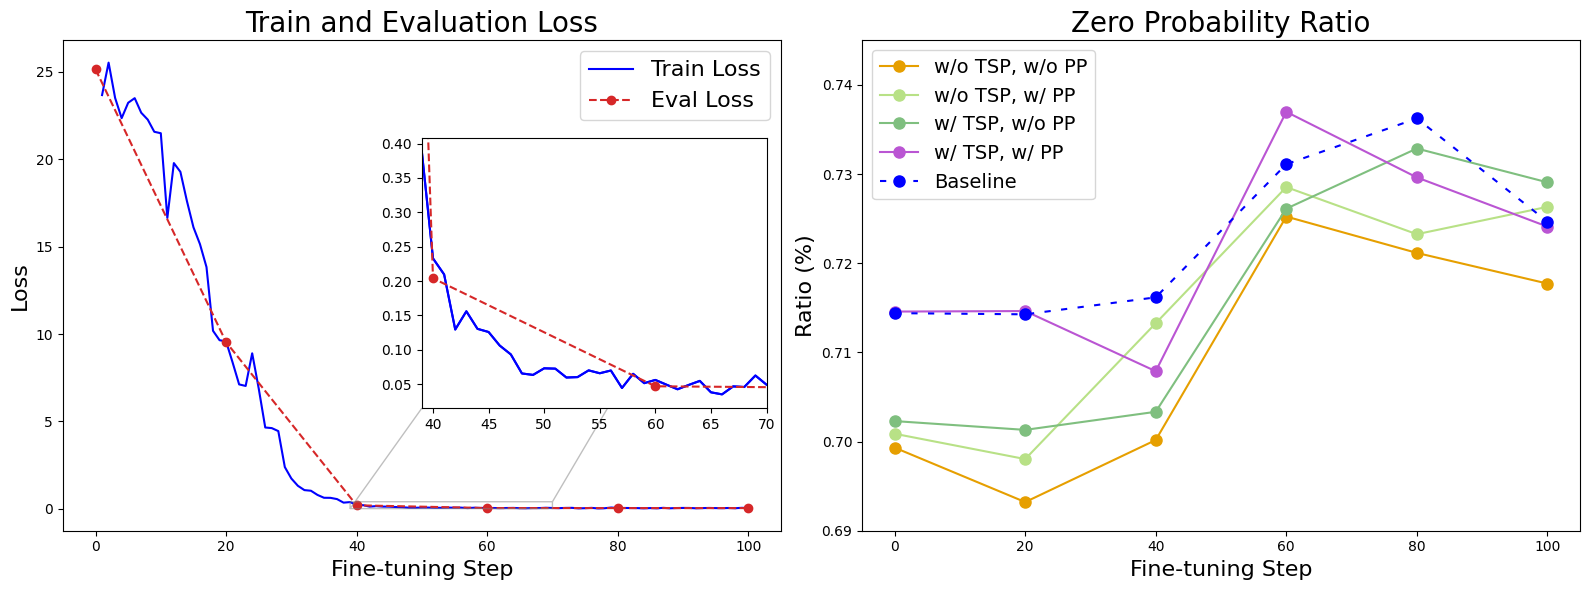

In [1]:
# Figure 5
# Please introduce yourself.
import re
import matplotlib.pyplot as plt

log_file_path = "results/YOUR_FINE-TUNING_PATH/loss_info.txt"

with open(log_file_path, 'r', encoding='utf-8') as f:
    log_text = f.read()

loss_matches = re.findall(r"'loss':\s*([\d\.Ee+-]+)", log_text)
eval_loss_matches = re.findall(r"'eval_loss':\s*([\d\.Ee+-]+)", log_text)

loss_values = [float(x) for x in loss_matches]
eval_loss_values = [float(x) for x in eval_loss_matches]

print(loss_values)
print(eval_loss_values)

train_steps = list(range(1, 101))
eval_steps = [0, 20, 40, 60, 80, 100]

x_ratio = eval_steps
npp_nic_zero_probability_ratio  = [1-0.3006830299, 1-0.306787954, 1-0.2998281843, 1-0.2747659959, 1-0.278841993, 1-0.2822797982]
pp_nic_zero_probability_ratio   = [1-0.2991238503, 1-0.301965218, 1-0.28673031154, 1-0.2714609802, 1-0.2767438165, 1-0.2736768841]
npp_ic_zero_probability_ratio   = [1-0.2977034504, 1-0.2986900721, 1-0.2966613726, 1-0.2738800852, 1-0.2671320148, 1-0.2709248031]
pp_ic_zero_probability_ratio    = [1-0.2854202919, 1-0.2853637369, 1-0.2921126148, 1-0.2630193443, 1-0.2703722297, 1-0.275891594]
baseline_zero_probability_ratio = [1-0.2855968078, 1-0.2857291835, 1-0.2838264872, 1-0.2688922821, 1-0.2637601243, 1-0.2753231233]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].plot(train_steps, loss_values, label="Train Loss", color='blue')
axs[0].plot(eval_steps, eval_loss_values, label="Eval Loss", linestyle='--', color='#d62728', marker='o')
axs[0].set_xlabel("Fine-tuning Step", fontsize=16)
axs[0].set_ylabel("Loss", fontsize=16)
axs[0].set_title("Train and Evaluation Loss", fontsize=20)
axs[0].legend(fontsize=16)

inset_ax = axs[0].inset_axes([0.5, 0.25, 0.48, 0.55])
inset_ax.plot(train_steps, loss_values, color='blue')
inset_ax.plot(train_steps, loss_values, color='blue')
inset_ax.plot(eval_steps, eval_loss_values, linestyle='--', color='#d62728', marker='o')
inset_ax.set_xlim(39, 70)
ymin = min(min(loss_values[38:70]), min(eval_loss_values[2:4])) - 0.02
ymax = max(max(loss_values[38:70]), max(eval_loss_values[2:4])) + 0.02
inset_ax.set_ylim(ymin, ymax)
axs[0].indicate_inset_zoom(inset_ax)

axs[1].plot(x_ratio, npp_nic_zero_probability_ratio, label='w/o TSP, w/o PP', linestyle='-', marker='o', markersize=8, color='#E69F00')
axs[1].plot(x_ratio, pp_nic_zero_probability_ratio, label='w/o TSP, w/ PP', linestyle='-', marker='o', markersize=8, color='#B8E186')
axs[1].plot(x_ratio, npp_ic_zero_probability_ratio, label='w/ TSP, w/o PP', linestyle='-', marker='o', markersize=8, color='#7FBF7F')
axs[1].plot(x_ratio, pp_ic_zero_probability_ratio, label='w/ TSP, w/ PP', linestyle='-', marker='o', markersize=8, color='#BA55D3')
axs[1].plot(x_ratio, baseline_zero_probability_ratio, label="Baseline", linestyle=(0, (3, 5)), marker='o', markersize=8, color='blue')
axs[1].set_xticks(x_ratio)
axs[1].set_ylim(0.69, 0.745)
axs[1].set_xlabel("Fine-tuning Step", fontsize=16)
axs[1].set_ylabel("Ratio (%)", fontsize=16)
axs[1].set_title("Zero Probability Ratio", fontsize=20)
axs[1].legend(loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()

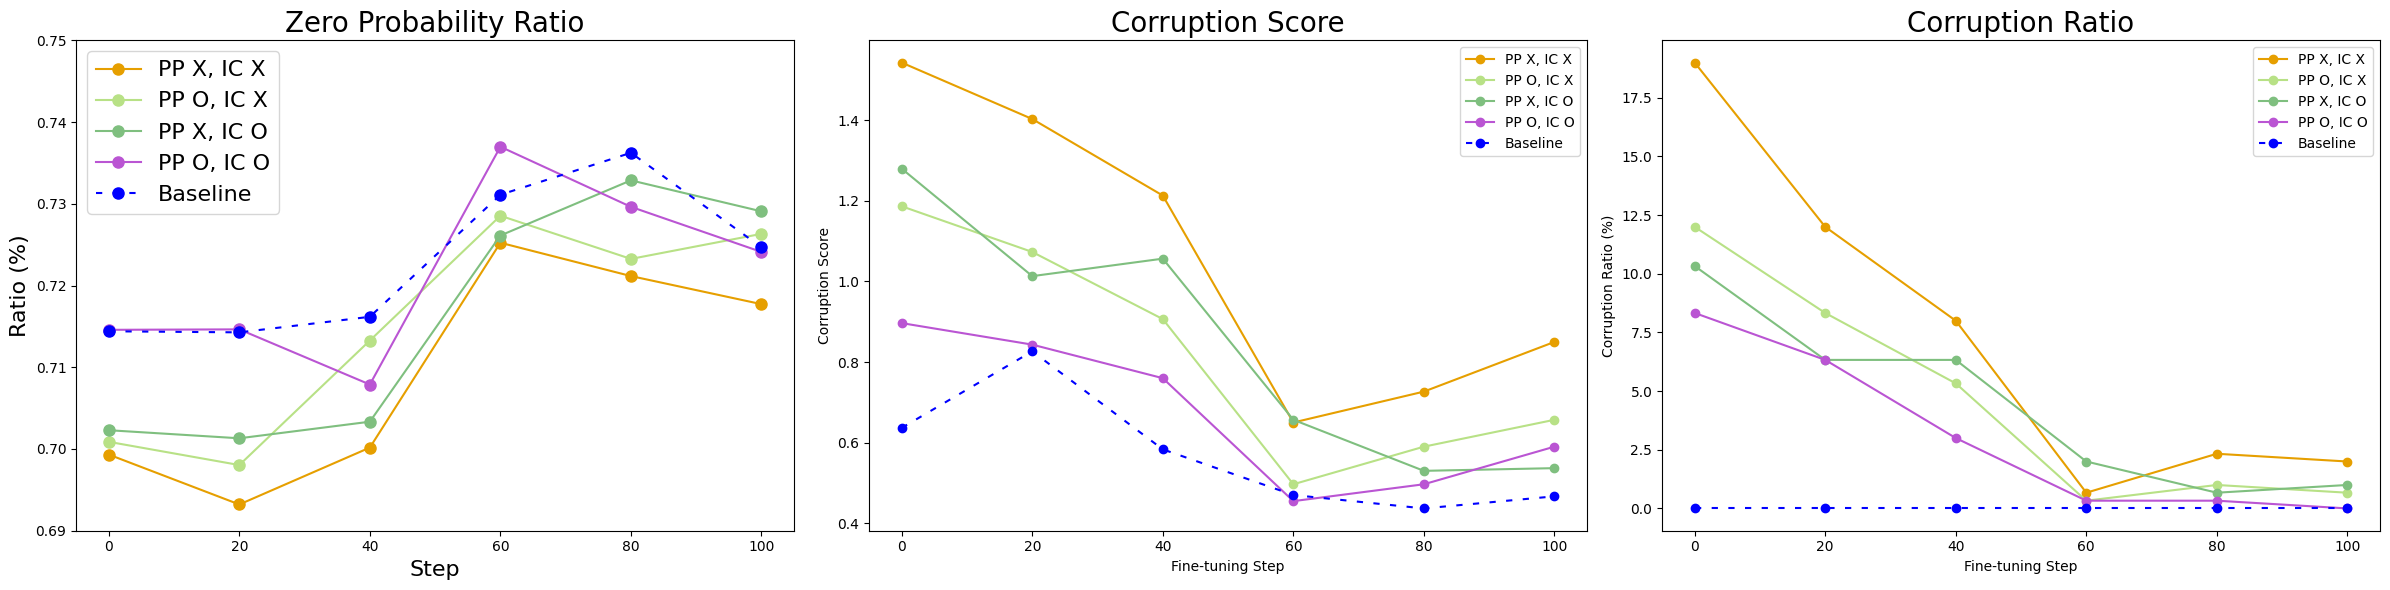

In [11]:
import numpy as np
import matplotlib.pyplot as plt

log_file_path = "results/YOUR_FINE-TUNING_PATH/loss_info.txt"

train_steps = list(range(1, 101))
eval_steps = [0, 20, 40, 60, 80, 100]

x_ratio = eval_steps
npp_nic_zero_probability_ratio  = [1-0.3006830299, 1-0.306787954, 1-0.2998281843, 1-0.2747659959, 1-0.278841993, 1-0.2822797982]
pp_nic_zero_probability_ratio   = [1-0.2991238503, 1-0.301965218, 1-0.28673031154, 1-0.2714609802, 1-0.2767438165, 1-0.2736768841]
npp_ic_zero_probability_ratio   = [1-0.2977034504, 1-0.2986900721, 1-0.2966613726, 1-0.2738800852, 1-0.2671320148, 1-0.2709248031]
pp_ic_zero_probability_ratio    = [1-0.2854202919, 1-0.2853637369, 1-0.2921126148, 1-0.2630193443, 1-0.2703722297, 1-0.275891594]
baseline_zero_probability_ratio = [1-0.2855968078, 1-0.2857291835, 1-0.2838264872, 1-0.2688922821, 1-0.2637601243, 1-0.2753231233]

x_labels = [0, 20, 40, 60, 80, 100]

#                                      0      20      40      60      80     100
s2_NIC_not_pp_corruption_score = [1.5433, 1.4033, 1.2133, 0.6500, 0.7267, 0.8500]
s2_NIC_pp_corruption_score     = [1.1867, 1.0733, 0.9067, 0.4967, 0.5900, 0.6567]
s2_IC_not_pp_corruption_score  = [1.2800, 1.0133, 1.0567, 0.6567, 0.5300, 0.5367]
s2_IC_pp_corruption_score      = [0.8967, 0.8433, 0.7600, 0.4548, 0.4967, 0.5900]
base_corruption_score          = [0.6367, 0.8267, 0.5833, 0.4700, 0.4367, 0.4667]
#                                     0     20     40     60     80,   100
s2_NIC_not_pp_corruption_ratio = [19.00, 12.00,  8.00,  0.67,  2.33,  2.00]
s2_NIC_pp_corruption_ratio     = [12.00,  8.33,  5.33,  0.33,  1.00,  0.67]
s2_IC_not_pp_corruption_ratio  = [10.33,  6.33,  6.33,  2.00,  0.67,  1.00]
s2_IC_pp_corruption_ratio      = [ 8.33,  6.33,  3.00,  0.33,  0.33,  0.00]
base_corruption_ratio          = [ 0,  0,  0,  0,  0,  0]

x_positions = np.arange(len(x_labels))
selected_steps = [0, 20, 40, 60, 80, 100]
selected_indices = [x_labels.index(step) for step in selected_steps]

def filter_data(data):
    return [data[i] for i in selected_indices]

x_positions = np.arange(len(selected_steps))

fig, axs = plt.subplots(1, 3, figsize=(24, 6))

axs[0].plot(x_ratio, npp_nic_zero_probability_ratio, label="PP X, IC X", linestyle='-', marker='o', markersize=8, color='#E69F00')
axs[0].plot(x_ratio, pp_nic_zero_probability_ratio, label="PP O, IC X", linestyle='-', marker='o', markersize=8, color='#B8E186')
axs[0].plot(x_ratio, npp_ic_zero_probability_ratio, label="PP X, IC O", linestyle='-', marker='o', markersize=8, color='#7FBF7F')
axs[0].plot(x_ratio, pp_ic_zero_probability_ratio, label="PP O, IC O", linestyle='-', marker='o', markersize=8, color='#BA55D3')
axs[0].plot(x_ratio, baseline_zero_probability_ratio, label="Baseline", linestyle=(0, (3, 5)), marker='o', markersize=8, color='blue')
axs[0].set_xticks(x_ratio)
axs[0].set_ylim(0.69, 0.75)
axs[0].set_xlabel("Step", fontsize=16)
axs[0].set_ylabel("Ratio (%)", fontsize=16)
axs[0].set_title("Zero Probability Ratio", fontsize=20)
axs[0].legend(loc='upper left', fontsize=16)

axs[1].plot(x_positions, filter_data(s2_NIC_not_pp_corruption_score), marker='o', linestyle='-', color='#E69F00', label='PP X, IC X')
axs[1].plot(x_positions, filter_data(s2_NIC_pp_corruption_score), marker='o', linestyle='-', color='#B8E186', label='PP O, IC X')
axs[1].plot(x_positions, filter_data(s2_IC_not_pp_corruption_score), marker='o', linestyle='-', color='#7FBF7F', label='PP X, IC O')
axs[1].plot(x_positions, filter_data(s2_IC_pp_corruption_score), marker='o', linestyle='-', color='#BA55D3', label='PP O, IC O')
axs[1].plot(x_positions, filter_data(base_corruption_score), marker='o', linestyle=(0, (3, 5)), color='blue', label='Baseline')
axs[1].set_title('Corruption Score', fontsize=20)
axs[1].set_xticks(x_positions)
axs[1].set_xticklabels(selected_steps)
axs[1].set_xlabel('Fine-tuning Step')
axs[1].set_ylabel('Corruption Score')
axs[1].legend(loc='upper right')

axs[2].plot(x_positions, filter_data(s2_NIC_not_pp_corruption_ratio), marker='o', linestyle='-', color='#E69F00', label='PP X, IC X')
axs[2].plot(x_positions, filter_data(s2_NIC_pp_corruption_ratio), marker='o', linestyle='-', color='#B8E186', label='PP O, IC X')
axs[2].plot(x_positions, filter_data(s2_IC_not_pp_corruption_ratio), marker='o', linestyle='-', color='#7FBF7F', label='PP X, IC O')
axs[2].plot(x_positions, filter_data(s2_IC_pp_corruption_ratio), marker='o', linestyle='-', color='#BA55D3', label='PP O, IC O')
axs[2].plot(x_positions, filter_data(base_corruption_ratio), marker='o', linestyle=(0, (3, 5)), color='blue', label='Baseline')
axs[2].set_title('Corruption Ratio', fontsize=20)
axs[2].set_xticks(x_positions)
axs[2].set_xticklabels(selected_steps)
axs[2].set_xlabel('Fine-tuning Step')
axs[2].set_ylabel('Corruption Ratio (%)')
axs[2].legend(loc='upper right')

plt.tight_layout()
plt.show()